<a href="https://colab.research.google.com/github/ParsaKeerthana/DataMiningAssignment3/blob/main/Air_Passenger_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Air_Passenger_Satisfaction.csv')

# Display the first few rows of the dataset and its basic info
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

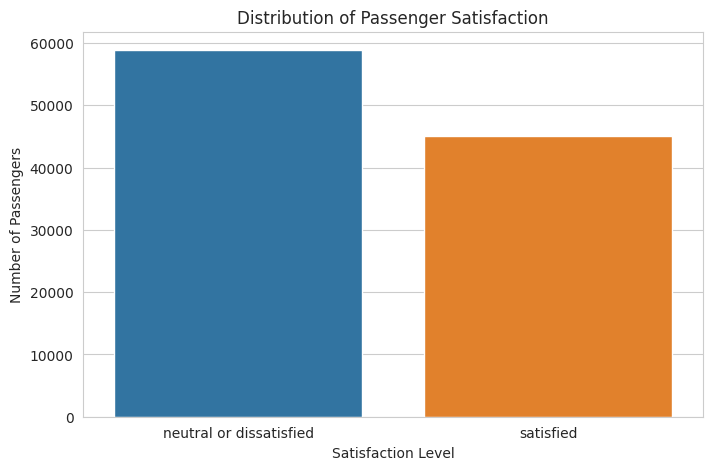

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set_style("whitegrid")

# Visualize the distribution of the target variable "satisfaction"
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="satisfaction")
plt.title("Distribution of Passenger Satisfaction")
plt.ylabel("Number of Passengers")
plt.xlabel("Satisfaction Level")
plt.show()

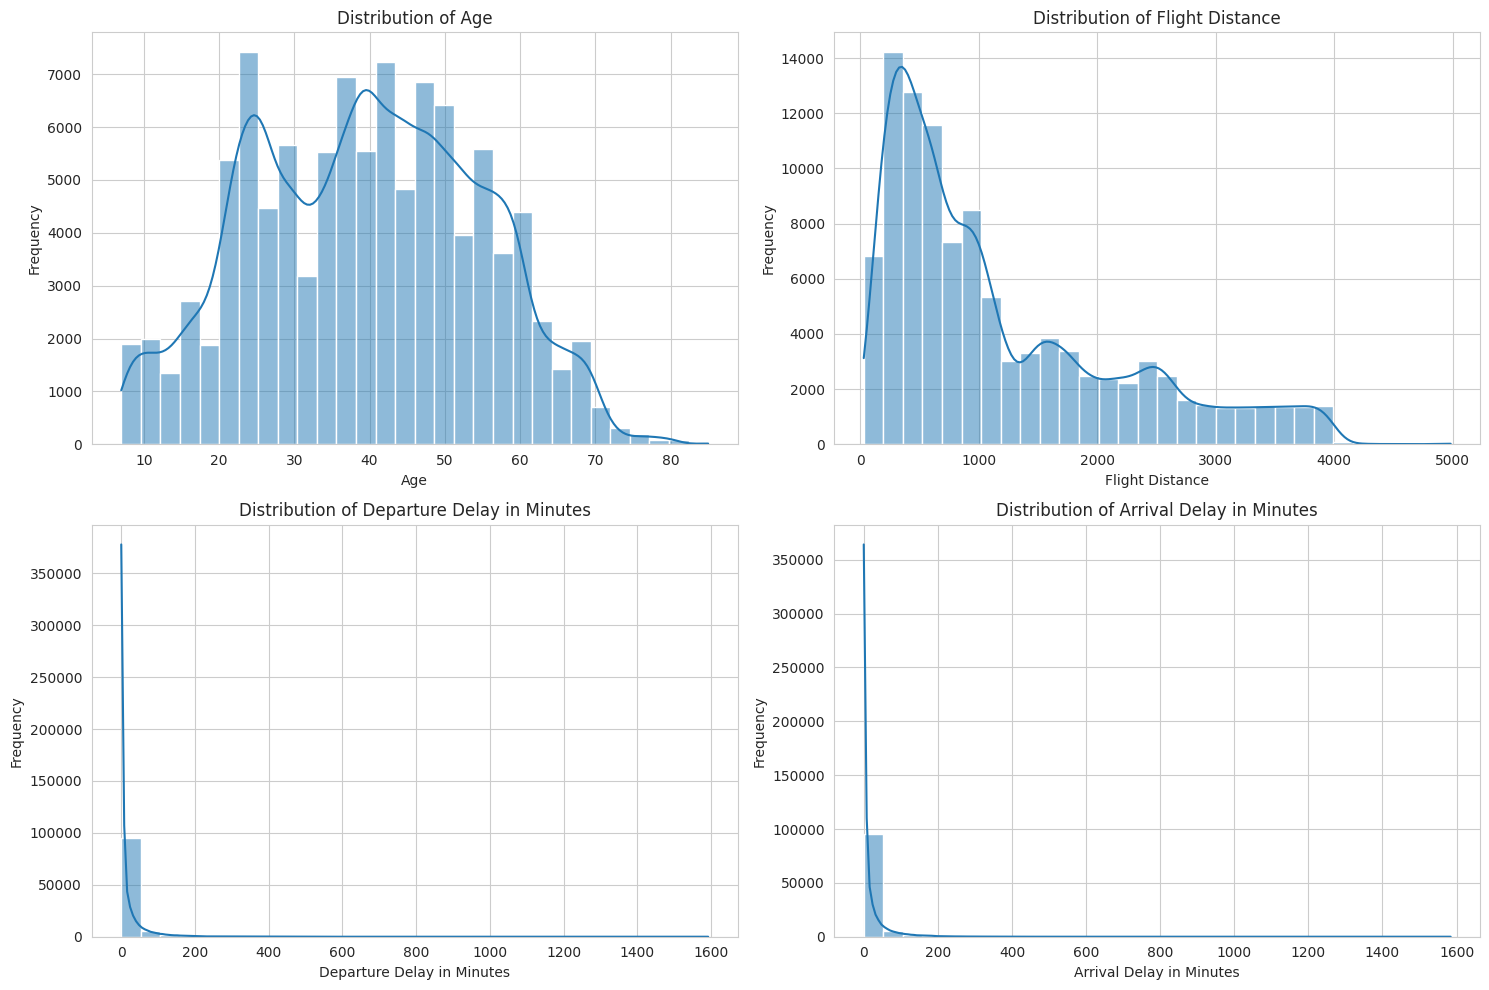

In [ ]:
# List of selected numerical features
features = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

# Plotting the distribution of the selected features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=feature, bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.ylabel("Frequency")
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

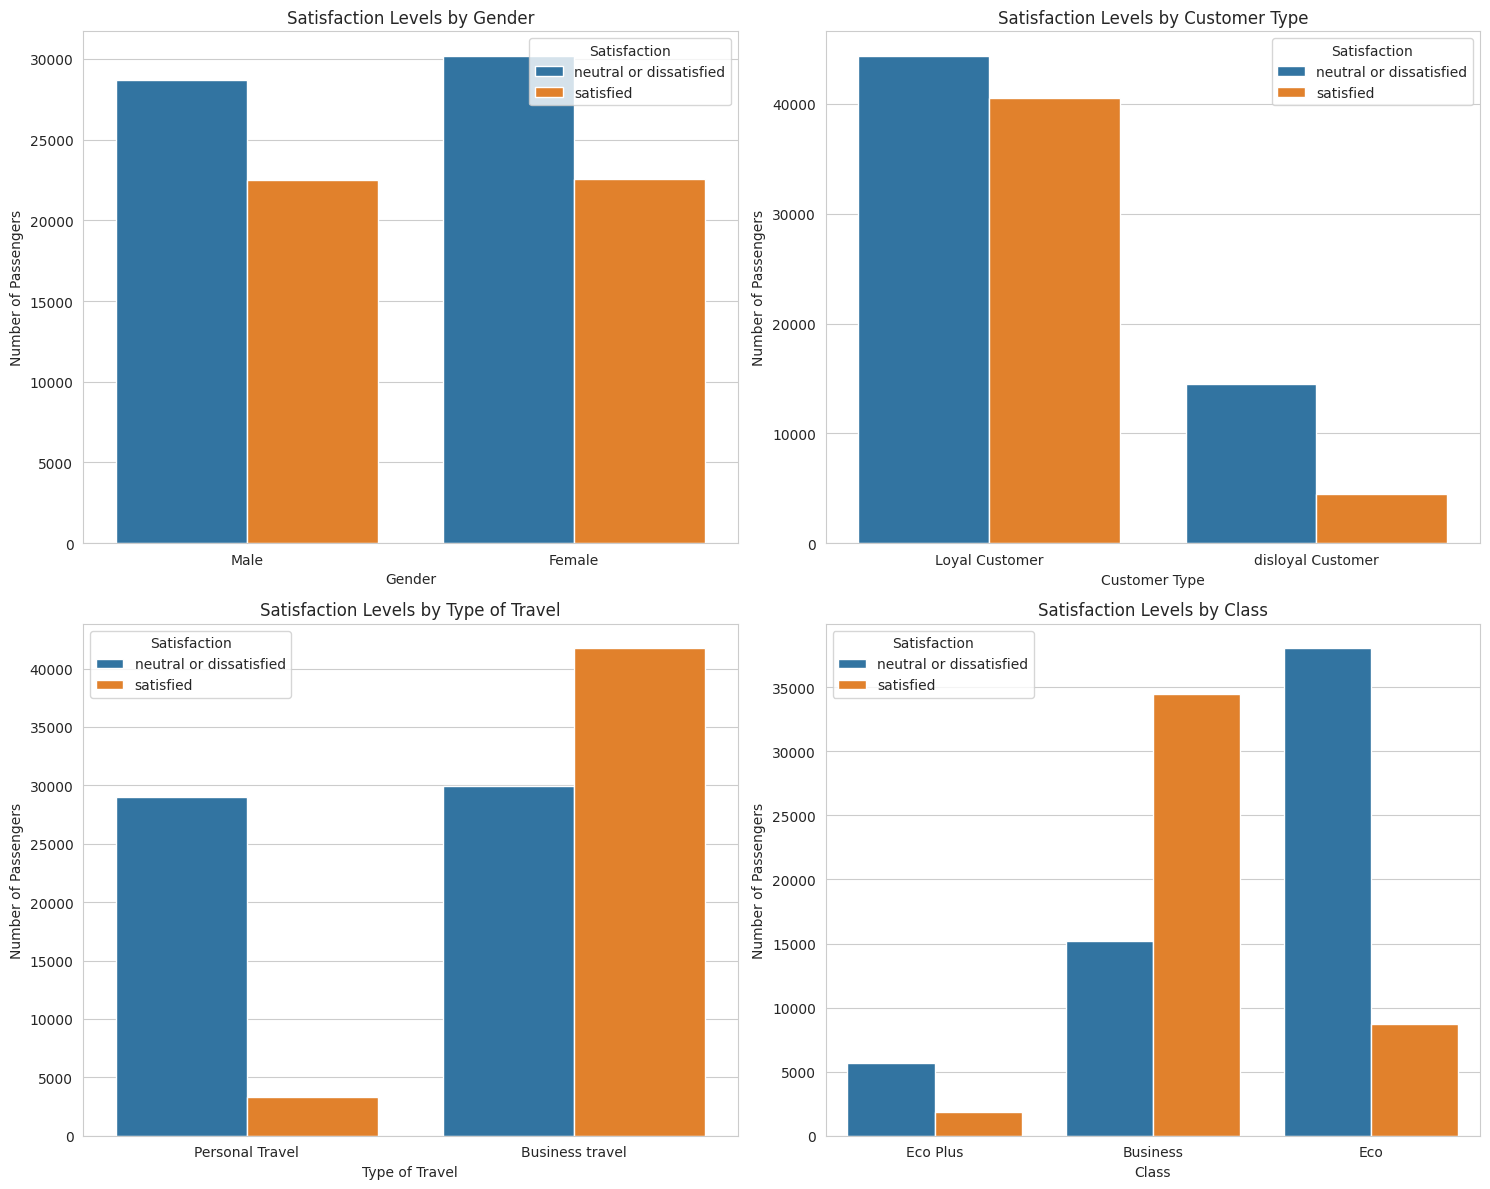

In [ ]:
# List of selected categorical features
cat_features = ["Gender", "Customer Type", "Type of Travel", "Class"]

# Plotting the relationship between selected categorical features and target variable
plt.figure(figsize=(15, 12))

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=feature, hue="satisfaction")
    plt.title(f"Satisfaction Levels by {feature}")
    plt.ylabel("Number of Passengers")
    plt.xlabel(feature)
    plt.legend(title="Satisfaction")

plt.tight_layout()
plt.show()

In [ ]:
# Identifying columns with missing values and the number of missing entries
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values


Arrival Delay in Minutes    310
dtype: int64

In [ ]:
# Imputing missing values in "Arrival Delay in Minutes" with its median
median_value = data["Arrival Delay in Minutes"].median()
data["Arrival Delay in Minutes"].fillna(median_value, inplace=True)

# Confirming that there are no more missing values
missing_after_imputation = data.isnull().sum().sum()

missing_after_imputation

0

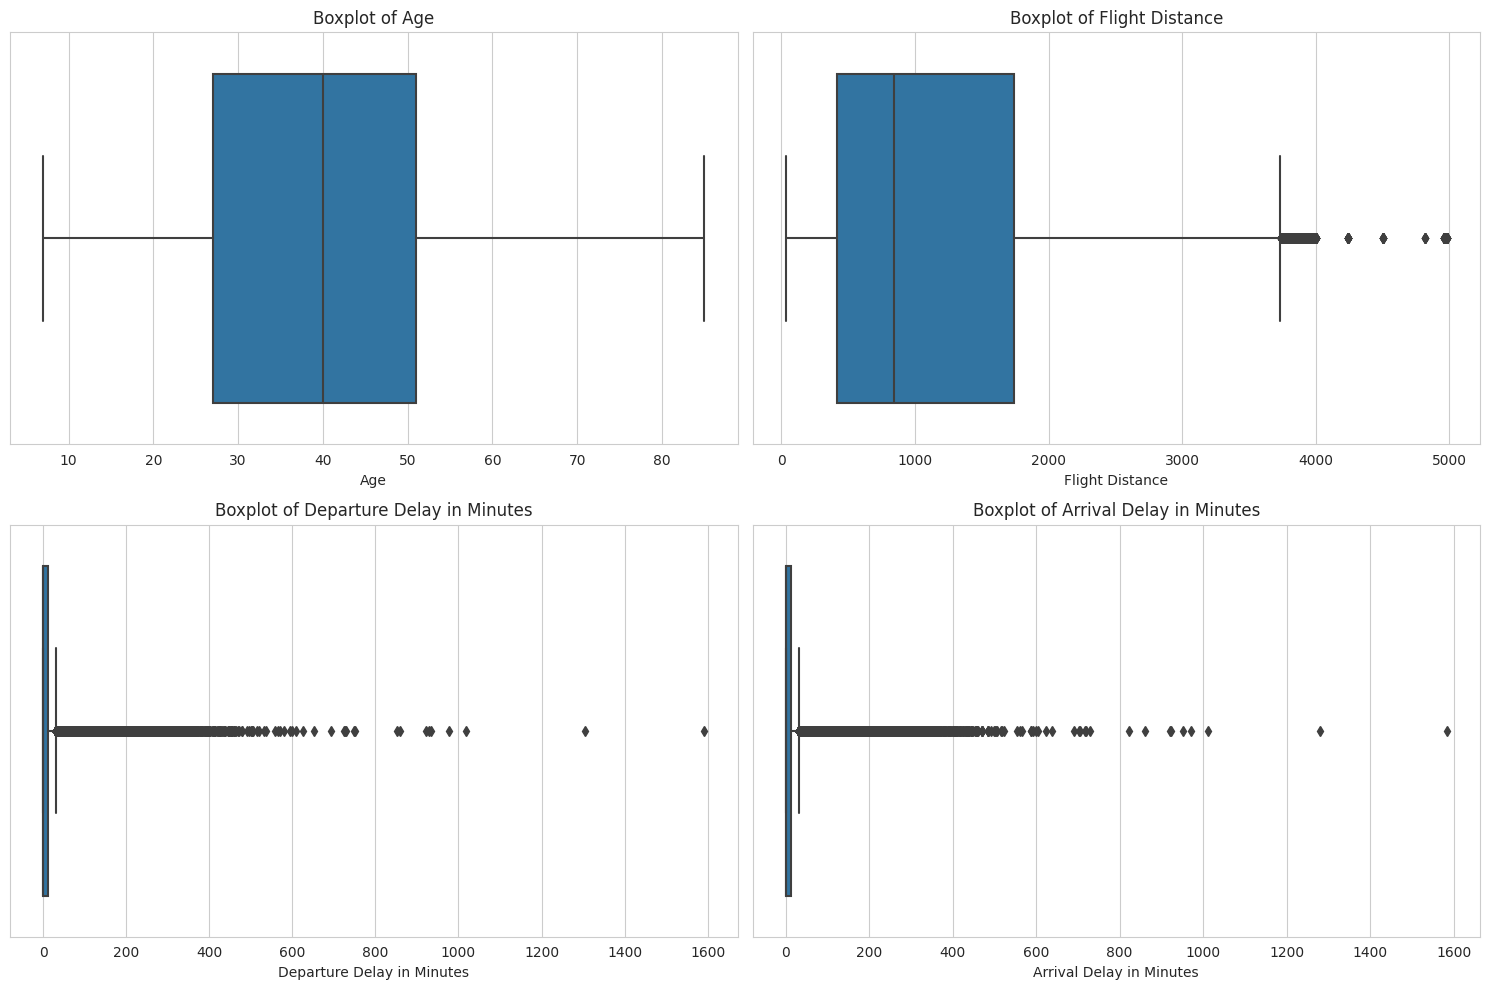

In [ ]:
# Plotting boxplots for selected numerical features to identify outliers
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

In [ ]:
pip install pycaret

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.2
    Uninstalling scipy-1.7.2:
      Successfully uninstalled scipy-1.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.


In [ ]:
from pycaret.classification import setup

# Initializing the PyCaret environment
clf1 = setup(data=data,
             target='satisfaction',
             session_id=123,
             verbose=False)

In [ ]:
from pycaret.classification import compare_models

# Compare models and select the best one based on accuracy
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9650,0.9953,0.9443,0.9742,0.9590,0.9285,0.9289,4.5160
xgboost,Extreme Gradient Boosting,0.9640,0.9951,0.9461,0.9701,0.9579,0.9265,0.9267,14.7110
rf,Random Forest Classifier,0.9636,0.9939,0.9422,0.9729,0.9573,0.9255,0.9259,12.6490
et,Extra Trees Classifier,0.9625,0.9936,0.9393,0.9734,0.9560,0.9234,0.9239,8.4450
gbc,Gradient Boosting Classifier,0.9451,0.9884,0.9239,0.9481,0.9358,0.8878,0.8881,17.8970
dt,Decision Tree Classifier,0.9444,0.9435,0.9370,0.9349,0.9359,0.8868,0.8869,1.1570
ada,Ada Boost Classifier,0.9299,0.9790,0.9131,0.9242,0.9186,0.8570,0.8571,4.6340
ridge,Ridge Classifier,0.8735,0.0000,0.8371,0.8666,0.8516,0.7415,0.7418,0.8830
lda,Linear Discriminant Analysis,0.8735,0.9258,0.8372,0.8664,0.8515,0.7414,0.7417,1.0560
qda,Quadratic Discriminant Analysis,0.8571,0.9191,0.8062,0.8556,0.8302,0.7070,0.7079,0.6780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
from pycaret.classification import create_model

lightgbm_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9685,0.9959,0.9524,0.9744,0.9633,0.9357,0.9359
1,0.9659,0.9957,0.9470,0.9736,0.9601,0.9304,0.9306
2,0.9619,0.9949,0.9397,0.9715,0.9553,0.9221,0.9225
3,0.9669,0.9953,0.9457,0.9770,0.9611,0.9323,0.9326
4,0.9640,0.9944,0.9422,0.9738,0.9577,0.9264,0.9267
5,0.9671,0.9952,0.9442,0.9793,0.9614,0.9328,0.9333
6,0.9616,0.9950,0.9381,0.9724,0.9549,0.9216,0.9220
7,0.9607,0.9949,0.9410,0.9674,0.9540,0.9197,0.9199
8,0.9658,0.9956,0.9451,0.9751,0.9599,0.9300,0.9304


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
from pycaret.classification import tune_model

# Tune the best model
tuned_model = tune_model(lightgbm_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9671,0.9960,0.9486,0.9749,0.9616,0.9329,0.9331
1,0.9667,0.9956,0.9461,0.9764,0.9610,0.9320,0.9324
2,0.9603,0.9946,0.9368,0.9704,0.9533,0.9188,0.9192
3,0.9656,0.9951,0.9464,0.9736,0.9598,0.9298,0.9301
4,0.9622,0.9939,0.9391,0.9727,0.9556,0.9227,0.9231
5,0.9663,0.9949,0.9451,0.9764,0.9605,0.9312,0.9315
6,0.9643,0.9949,0.9423,0.9744,0.9581,0.9269,0.9273
7,0.9607,0.9945,0.9413,0.9671,0.9540,0.9197,0.9199
8,0.9627,0.9951,0.9448,0.9685,0.9565,0.9239,0.9241


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


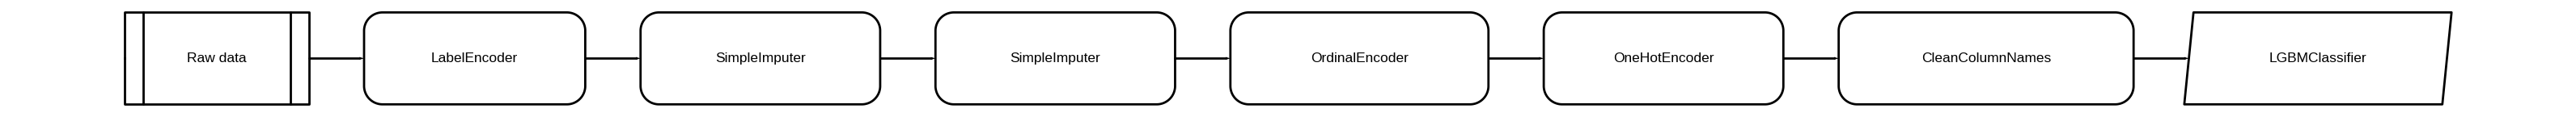

In [ ]:
from pycaret.classification import evaluate_model

# Evaluate the tuned model
evaluate_model(tuned_model)